In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import solve_ivp

from Broth_model import *
from Plaque_model import *
from Swimming_model import *
from Initial_values import *
from Plotters import *

# Broth model

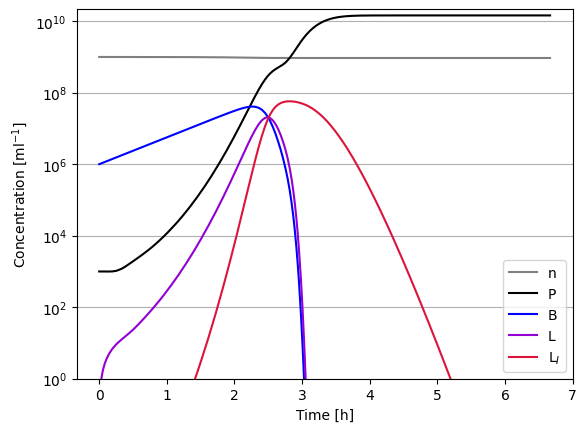

In [2]:
#Fetch default parameter values 
V = DV() 

#Option to change parameter values (see Initial_values.py)
#V.f_tau = 10

#Fetch initial values 
y0 = IV("M1")

#Set simulation length (mins)
t = 20*V.tau0

#Run simulation
M1sol = solve_ivp(M1,[0,t],y0,args = Const(V,"M1"))

#Plot
BrothPlotter("M1",V,M1sol.t,M1sol.y, scale = "log",figtitle = "M1")

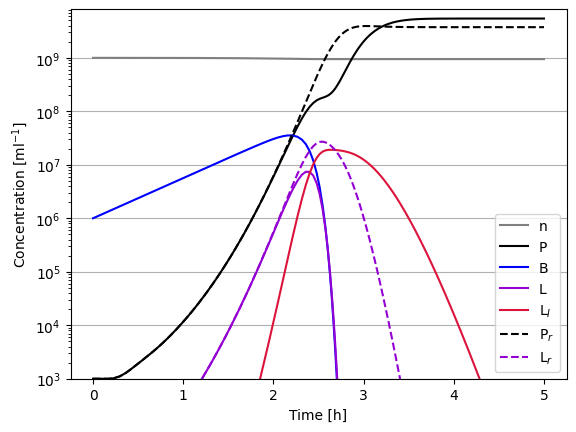

In [3]:
#Competition between wild type and r-mutant

V2 = DV() #Default values
V2.comp = 1 #Competition version

#Intial values
y0 = IV("M1",comp = V2.comp)

#Simulation length (mins)
t = 5*60 

M1Csol = solve_ivp(M1,[0,t],y0,args = Const(V2,"M1"))
BrothPlotter("M1",V2,M1Csol.t,M1Csol.y,figtitle = "M1C")

# Plaque model

In [24]:
#r-mutant plaque

VP = DVS(Rmax = 1.5*10**3) #Default values
y0 = IVS("MP0",VP) #Intial values
t = 3*60 #Simulation time
simP = MPShell("MP0",y0,VP,t)

100%|██████████| 67500/67500 [00:14<00:00, 4567.65it/s]


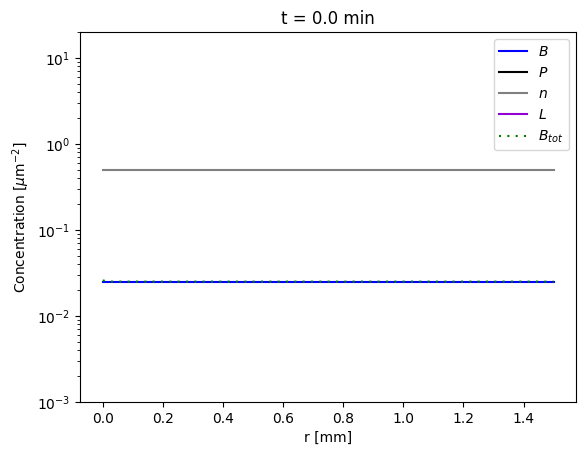

In [25]:
GifGenerator(simP,VP,t,"MP0",f"MP0",ylim = (0.001,20),legendloc = "upper right",Btot = True)

In [26]:
#Wild type plaque

VP2 = DVS(Rmax = 1.5*10**3)
y0 = IVS("MP1",VP2)
t = 3*60
simP2 = MPShell("MP1",y0,VP2,t)

100%|██████████| 67500/67500 [00:27<00:00, 2496.32it/s]


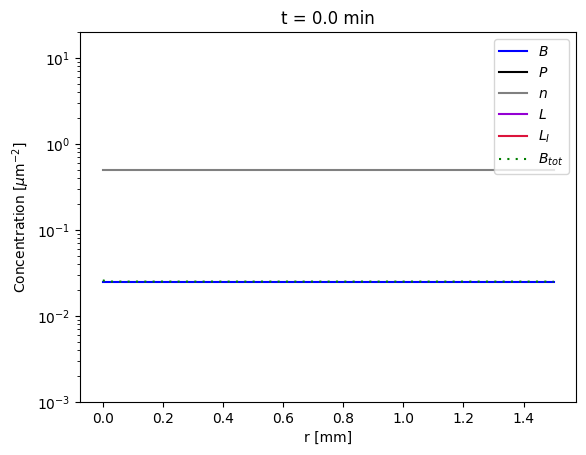

In [27]:
GifGenerator(simP2,VP2,t,"MP1",f"MP1",ylim = (0.001,20),legendloc = "upper right",Btot = True)

# Swimming model

In [32]:
#r-mutant swimming plate

#Set parameters
rho = 4*1e6 #Richness of the swimming medium - has a large effect on the simulation outcome
VS = DVS(dr = 20,rho = rho,Rmax = 40*10**3)

#Default values
y0 = IVS("MS0",VS)

#Start simulation
t = 20*60
simS = MSShell("MS0",y0,VS,t)

100%|██████████| 450000/450000 [13:27<00:00, 557.58it/s]


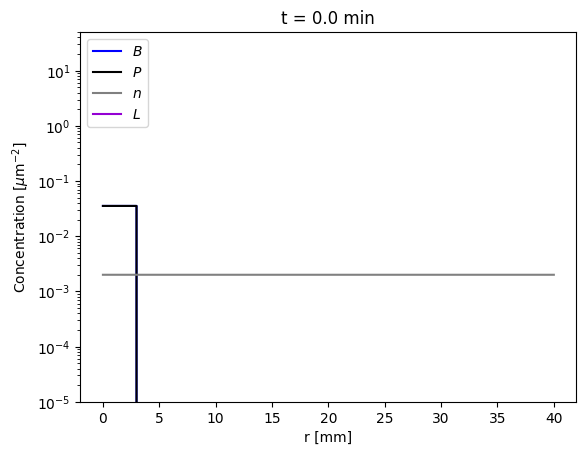

In [33]:
GifGenerator(simS,VS,t,"MS0",name = "MS0",ylim = (1e-5,50))

In [36]:
#Wild-type swimming plate

#Set parameters
rho = 4*1e6
VS2 = DVS(dr = 20,rho = rho,Rmax = 40*10**3)

#Default values
y0 = IVS("MS1",VS2)

#Start
t = 20*60
simS2 = MSShell("MS1",y0,VS2,t)

100%|██████████| 450000/450000 [20:52<00:00, 359.17it/s]


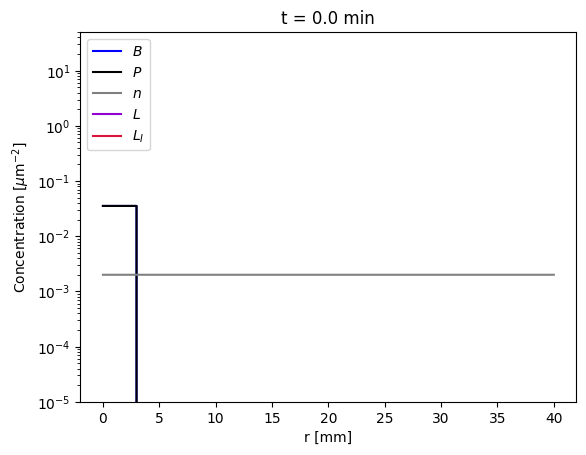

In [37]:
GifGenerator(simS2,VS2,t,"MS1",name = "MS1",ylim = (1e-5,50))